## Group Project (Notebook 1) - R

### comment

We are interested in the population and what kind of factors can affect to population. We downloaded the data sources from https://data.worldbank.org/ thourghout https://www.google.com/publicdata/directory.(The specific link for each dataset will be in the data document) In this first notebook, we aim to wrangle the different sources of data to make clean data tables for further analysis. 

In [1]:
library(tidyverse)
library(readr)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [12]:
Population <- read_csv("Population.csv", skip = 3)


Population

New names:
* `` -> `...68`
Rows: 266 Columns: 68
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (63): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (1): ...68

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,...68
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,NA
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720839314,NA
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,NA
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,NA
Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,NA
Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2775634,NA
Andorra,AND,"Population, total",SP.POP.TOTL,9443,10216,11014,11839,12690,13563,...,71621,71746,72540,73837,75013,76343,77700,79034,79824,NA
Arab World,ARB,"Population, total",SP.POP.TOTL,93359407,95760348,98268683,100892507,103618568,106444103,...,397922915,406501999,415077960,423664839,432545676,441467739,449228296,456520777,464684914,NA
United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,133426,140984,148877,157006,165305,173797,...,8835951,8916899,8994263,9068296,9140169,9211657,9287289,9365145,9441129,NA


### comment

The population data we downloaded contains unnecessary rows in the first two lines. When using the `read_csv()` function, it attempted to treat these rows as column names, which is not desired. To prevent this, we need to use the `skip` parameter. The population data consists of 266 observations and 68 columns. The columns "Indicator Name" and "Indicator Code" are repeated for all the rows. There is also a column labeled **...68**, but it does not contain any values and should be dropped in the next stage. Overall, the dataset is in a wide format, so we need to perform data wrangling to make it suitable for further data processing.

In [13]:
Population <- Population %>%
    select(-"...68", -"Indicator Name", -"Indicator Code")

Population

Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,54608,55811,56682,57475,58178,58782,59291,59522,...,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445
Africa Eastern and Southern,AFE,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720839314
Afghanistan,AFG,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
Africa Western and Central,AFW,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
Angola,AGO,5357195,5441333,5521400,5599827,5673199,5736582,5787044,5827503,...,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987
Albania,ALB,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,...,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2775634
Andorra,AND,9443,10216,11014,11839,12690,13563,14546,15745,...,71367,71621,71746,72540,73837,75013,76343,77700,79034,79824
Arab World,ARB,93359407,95760348,98268683,100892507,103618568,106444103,109394536,112499764,...,389131555,397922915,406501999,415077960,423664839,432545676,441467739,449228296,456520777,464684914
United Arab Emirates,ARE,133426,140984,148877,157006,165305,173797,182509,191404,...,8751847,8835951,8916899,8994263,9068296,9140169,9211657,9287289,9365145,9441129


### comment

First, we dropped the uninformative columns. Since we know this data pertains to population, we can assign the variable name "population" when converting it from wide format to long format. Among the values in the **Country Name** column, we observed that some entries have trailing white spaces. We attempted to trim these spaces but were unsuccessful in removing them. To address this issue, we downloaded the official data source from the UN, which includes both country names and country codes. We plan to join these tables later to obtain accurate country names and will temporarily retain the **Country Name** column in this dataset.

In [15]:
Population <- Population %>%
    gather(key = Year,
         value = Population,
         -c("Country Name", "Country Code")) %>%
    rename(Country_Name = "Country Name", Country_Code = "Country Code")

Population

Country_Name,Country_Code,Year,Population
<chr>,<chr>,<chr>,<dbl>
Aruba,ABW,1960,54608
Africa Eastern and Southern,AFE,1960,130692579
Afghanistan,AFG,1960,8622466
Africa Western and Central,AFW,1960,97256290
Angola,AGO,1960,5357195
Albania,ALB,1960,1608800
Andorra,AND,1960,9443
Arab World,ARB,1960,93359407
United Arab Emirates,ARE,1960,133426


### comment

Second, we converted the data format from wide to long format. The key is **Year** which are variables in wide format, the values are under the population variable and variables **Country Name** and **Country Code** stay the same. After changing the format, variables **Country Name**, **Country Code** are renamed with the underscore instead of whitespace to follow variable name rules. Now, the data table has 16758 observations and 4 features. This format has the manageable number of variable compared to before.

In [16]:
library(visdat)

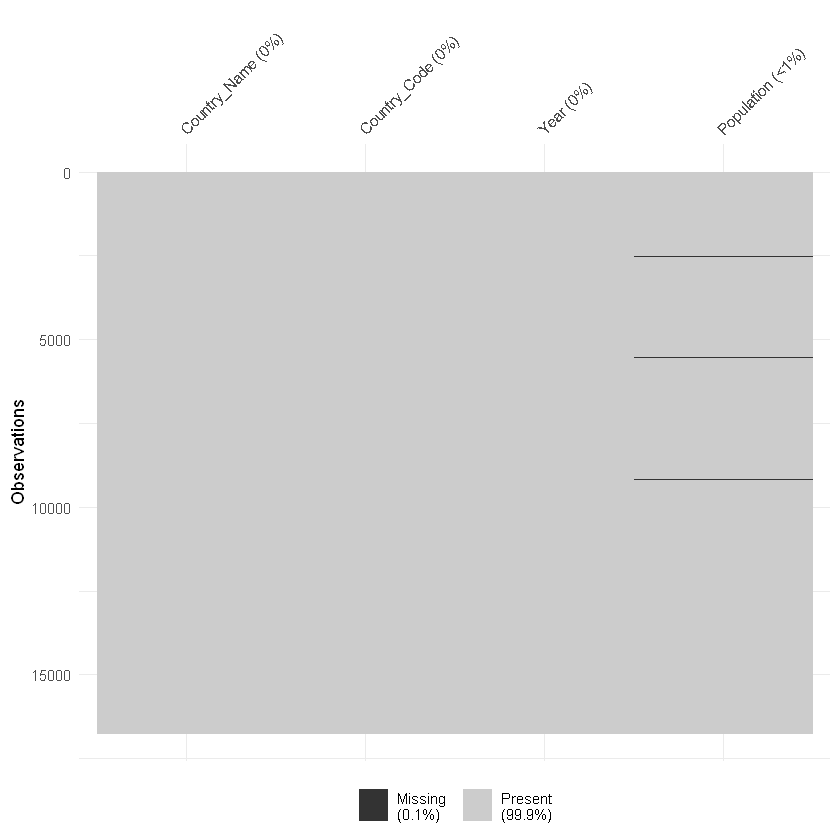

In [17]:
a <- Population %>%
    vis_miss()

a

### comment

Not many data model do not actually tolerant to missing values. Therefore, we need to think about how to deal with missing values in the dataset and make strategies for it. The `Population` data table has only 0.2% of missing values. 

In [18]:
filter(Population, is.na(Population))

Country_Name,Country_Code,Year,Population
<chr>,<chr>,<chr>,<dbl>
Not classified,INX,1960,NA
West Bank and Gaza,PSE,1960,NA
Not classified,INX,1961,NA
West Bank and Gaza,PSE,1961,NA
Not classified,INX,1962,NA
West Bank and Gaza,PSE,1962,NA
Not classified,INX,1963,NA
West Bank and Gaza,PSE,1963,NA
Not classified,INX,1964,NA


### comment

To decide the missing value strategy, we checked the observations with missing values. Most of them are "Not classified" country. It don't look like they are very useful. Therefore, omitting these rows would not hurt the data quality much.

In [8]:
Population_growth <- read_csv("Population growth.csv", skip = 3)


Population_growth

New names:
* `` -> `...68`
Rows: 266 Columns: 68
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (62): 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, ...
lgl  (2): 1960, ...68

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,...68
<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Aruba,ABW,Population growth (annual %),SP.POP.GROW,NA,2.1790590,1.5485717,1.3893371,1.2157206,1.0328409,...,0.69161526,0.6379592,0.59006249,0.53729571,0.4947953,0.45196966,0.13425530,-0.04504462,-0.08639228,NA
Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NA,2.6601801,2.7326331,2.7532483,2.8069150,2.8407869,...,2.77499029,2.8025858,2.72815853,2.65567160,2.6883714,2.69113438,2.67818372,2.60747169,2.54093737,NA
Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NA,1.9259516,2.0148789,2.0789966,2.1396508,2.2160069,...,3.65757607,3.1213412,2.58154940,2.86649215,2.8852080,2.90852909,3.13474691,2.85135765,2.53449832,NA
Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,NA,2.1157891,2.1457231,2.1908269,2.2113600,2.2425675,...,2.75073057,2.7233173,2.71305851,2.70626608,2.6692387,2.63398207,2.61564614,2.57337740,2.53979944,NA
Angola,AGO,Population growth (annual %),SP.POP.GROW,NA,1.5583550,1.4607384,1.4104253,1.3017452,1.1110406,...,3.68442897,3.6176775,3.58621101,3.55098664,3.4644570,3.39527779,3.26834840,3.16602986,3.09675267,NA
Albania,ALB,Population growth (annual %),SP.POP.GROW,NA,3.1208554,3.0567305,2.9537488,2.8806864,2.7540212,...,-0.20704700,-0.2912058,-0.15988041,-0.09197229,-0.2467320,-0.42600737,-0.57420696,-0.92691806,-1.28980007,NA
Andorra,AND,Population growth (annual %),SP.POP.GROW,NA,7.8681392,7.5212072,7.2231976,6.9415115,6.6531215,...,0.35527494,0.1743777,1.10060299,1.77218271,1.5801471,1.75749126,1.76189130,1.70228823,0.99460715,NA
Arab World,ARB,Population growth (annual %),SP.POP.GROW,NA,2.5717183,2.6193879,2.6700510,2.7019459,2.7268617,...,2.25922567,2.1559663,2.10969713,2.06873885,2.0961940,2.06268690,1.75789901,1.62333519,1.78833854,NA
United Arab Emirates,ARE,Population growth (annual %),SP.POP.GROW,NA,5.5099392,5.4474053,5.3163560,5.1508231,5.0095699,...,0.95639762,0.9119500,0.86386892,0.81974447,0.7894501,0.77908718,0.81769439,0.83481279,0.80807515,NA


### comment

There is also population growth rate dataset. This can be joined to `Population` table to indicate more demographic information. The csv files from the same site seem like they all have the same format. As they all have the same format, this can be automated. This step will be done with a user defined function for later process. 

In [9]:
Population_growth <- Population_growth %>%
    select(-"...68", -"Indicator Name", -"Indicator Code")  %>%
    gather(key = Year,
           value = Population_Growth_Rate,
           -c("Country Name", "Country Code")) %>%
    rename(Country_Name = "Country Name", Country_Code = "Country Code")

Population_growth

Country_Name,Country_Code,Year,Population_Growth_Rate
<chr>,<chr>,<chr>,<dbl>
Aruba,ABW,1960,NA
Africa Eastern and Southern,AFE,1960,NA
Afghanistan,AFG,1960,NA
Africa Western and Central,AFW,1960,NA
Angola,AGO,1960,NA
Albania,ALB,1960,NA
Andorra,AND,1960,NA
Arab World,ARB,1960,NA
United Arab Emirates,ARE,1960,NA


### comment

After we checked the format of dataset is the same as others, we conducted the same steps including selecting columns, converting data format from wide to long, and renaming some columns. 

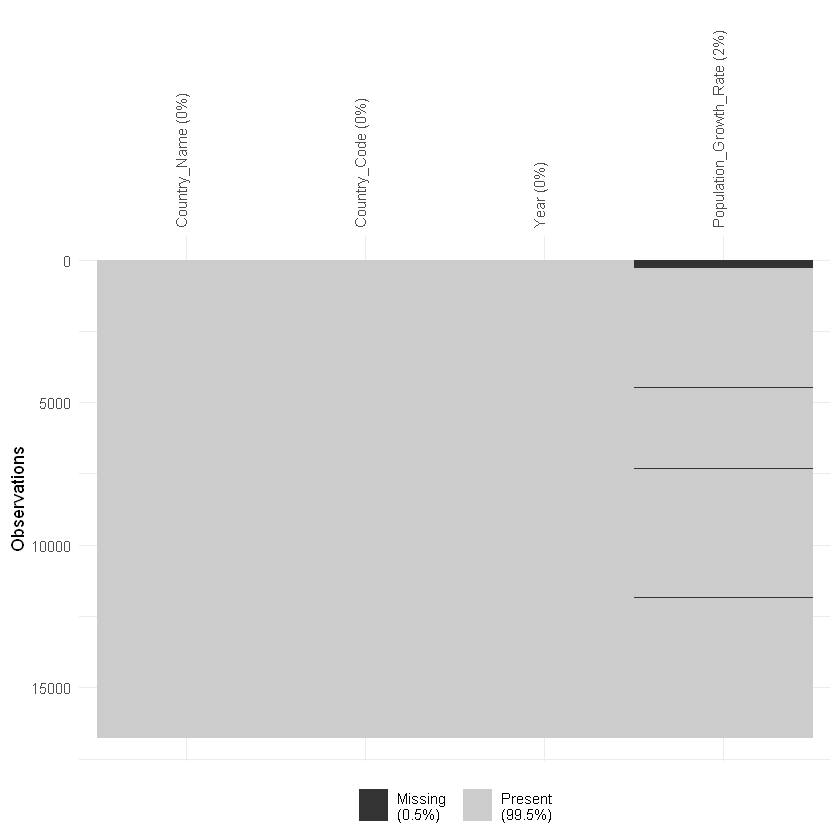

In [10]:
b <- Population_growth %>%
    vis_miss() + 
    theme(axis.text.x = element_text(angle = 90))

b

### comment

Checked the missing values as well. variable **Population_growth_rate** has 2% of missing data. Most of them formed a cluster in front part of the data which can mean they didn't start to collect the data from the start with some issue. We can check other missing values except the front part to see the pattern of missingness.

In [11]:
filter(Population_growth, is.na(Population_Growth_Rate))

Country_Name,Country_Code,Year,Population_Growth_Rate
<chr>,<chr>,<chr>,<dbl>
Aruba,ABW,1960,NA
Africa Eastern and Southern,AFE,1960,NA
Afghanistan,AFG,1960,NA
Africa Western and Central,AFW,1960,NA
Angola,AGO,1960,NA
Albania,ALB,1960,NA
Andorra,AND,1960,NA
Arab World,ARB,1960,NA
United Arab Emirates,ARE,1960,NA


### comment

Similar to above, most of them have Not classified country name. As all countries' data is missing in 1960 and most of them are Not classified, partial deletion can be better than imputation.

In [12]:
Population <- Population %>%
    full_join(Population_growth, by = c("Country_Name", "Country_Code", "Year"))

Population

Country_Name,Country_Code,Year,Population,Population_Growth_Rate
<chr>,<chr>,<chr>,<dbl>,<dbl>
Aruba,ABW,1960,54608,NA
Africa Eastern and Southern,AFE,1960,130692579,NA
Afghanistan,AFG,1960,8622466,NA
Africa Western and Central,AFW,1960,97256290,NA
Angola,AGO,1960,5357195,NA
Albania,ALB,1960,1608800,NA
Andorra,AND,1960,9443,NA
Arab World,ARB,1960,93359407,NA
United Arab Emirates,ARE,1960,133426,NA


### comment

Joined two dataset using `full_join()`. We will omit missing values after joining process, so we want every rows from both data by using `full_join()`. The key is **Country_Name**, **Country_Code**, and **Year** all together. The unique identifier for this dataset is not one column. The combinaton of either **Country_Name** or **Country_Code** and **Year** forms a identifier.

In [13]:
Population_Clean <- Population %>%
  na.omit()

Population_Clean

Country_Name,Country_Code,Year,Population,Population_Growth_Rate
<chr>,<chr>,<chr>,<dbl>,<dbl>
Aruba,ABW,1961,55811,2.1790590
Africa Eastern and Southern,AFE,1961,134169237,2.6601801
Afghanistan,AFG,1961,8790140,1.9259516
Africa Western and Central,AFW,1961,99314028,2.1157891
Angola,AGO,1961,5441333,1.5583550
Albania,ALB,1961,1659800,3.1208554
Andorra,AND,1961,10216,7.8681392
Arab World,ARB,1961,95760348,2.5717183
United Arab Emirates,ARE,1961,140984,5.5099392


### comment

Finally, the observarions with missing values are omitted. This is the clean version of demographic data. 

In [14]:
myfunction <- function(data_names){

    joined_data <- data.frame()
    
    for (data in data_names) {
        d <- read_csv(data, skip = 3)
        new_colname = d[[1,3]]
        d <- d %>%
            select(-"...68", -"Indicator Name", -"Indicator Code") %>%
            rename(Country_Name = "Country Name", Country_Code = "Country Code") %>%
            gather(key = Year,
                   value = !!new_colname,
                   -c("Country_Name", "Country_Code"))

        if (nrow(joined_data) == 0) {
            joined_data <- d
        } else {
            joined_data <- full_join(joined_data, d, by = c("Country_Name", "Country_Code", "Year"))
        }
        
    }

    return(joined_data)
    
}

### comment

As we check that the csv files from the same source have the same format, we made a function to make the automatic process. All the process is the same but the column name of the value when the data converting the format needs to be different for every data table. The data had their indicator in **Indicator Name** and it was always 3rd column. Therefore, the value was extracted from the original table using `d[[1,3]]`. We have to use **!!** in front of value name to make R acknowlege it's the value from above, not character itself. 

In [15]:
economic_data_names <- c("Unemployment rate.csv",
                         "Poverty headcount ratio.csv",
                         "GDP(current intenational$).csv",
                         "Deposit interest rate.csv",
                         "Total reserves (includes gold, current US$).csv",
                         "Stocks traded.csv",
                         "Inflation, consumer prices .csv")

Economic_factors <- myfunction(economic_data_names)

New names:
* `` -> `...68`
Rows: 266 Columns: 68
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (32): 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, ...
lgl (32): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
* `` -> `...68`
Rows: 266 Columns: 68
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (60): 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, ...
lgl  (4): 1960, 1961, 1962, ...68

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet th

### comment

We collected economy related dataset to see if that factors affected to population or not. To use the function we defined above, we made a vector of name of files and insert that it as a parameter in `myFunction()`. 

In [16]:
Economic_factors

Country_Name,Country_Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"GDP, PPP (current international $)",Deposit interest rate (%),"Total reserves (includes gold, current US$)","Stocks traded, total value (% of GDP)","Inflation, consumer prices (annual %)"
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1960,NA,NA,NA,NA,NA,NA,NA
Africa Eastern and Southern,AFE,1960,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AFG,1960,NA,NA,NA,NA,50690800,NA,NA
Africa Western and Central,AFW,1960,NA,NA,NA,NA,NA,NA,NA
Angola,AGO,1960,NA,NA,NA,NA,NA,NA,NA
Albania,ALB,1960,NA,NA,NA,NA,NA,NA,NA
Andorra,AND,1960,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,1960,NA,NA,NA,NA,NA,NA,NA
United Arab Emirates,ARE,1960,NA,NA,NA,NA,NA,NA,NA


### comment

We obtained the data table which includes all the information from the csv files vector. There are 7 factors and all has their indicator column names. The function worked well! 

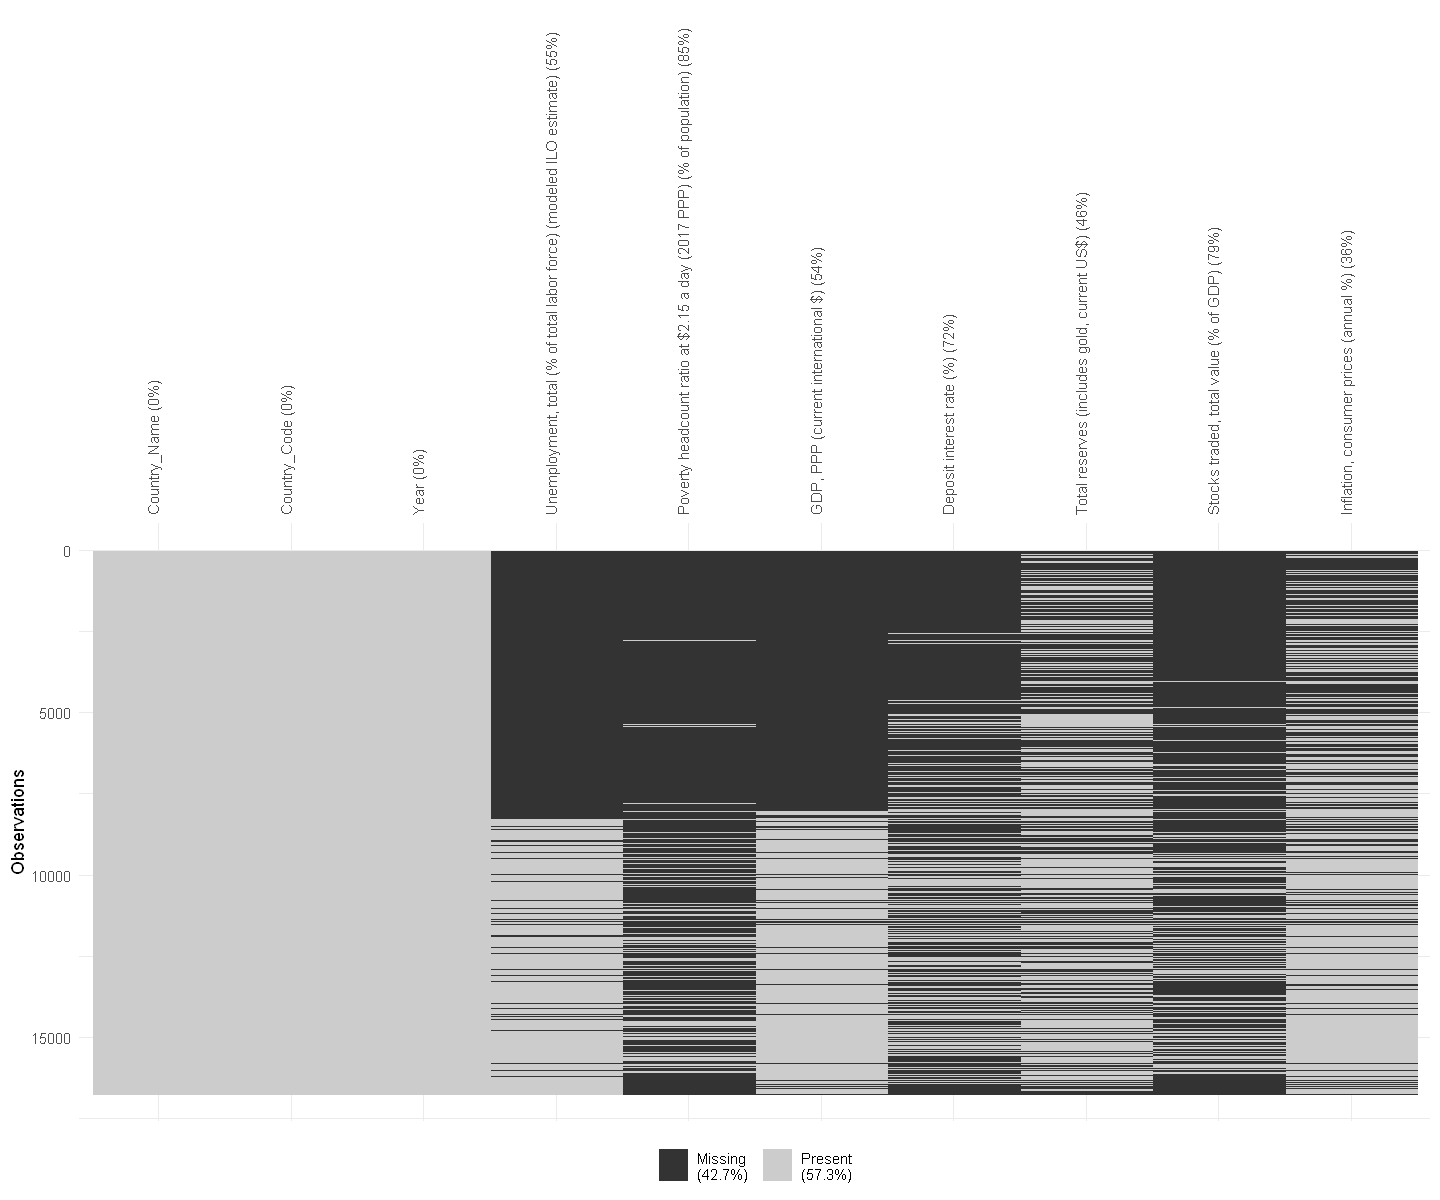

In [17]:
library(repr)
options(repr.plot.width = 12, repr.plot.height = 10)


c <- Economic_factors %>% 
    vis_miss() + 
    theme(axis.text.x = element_text(angle = 90))

c

### comment

However, it looked like there are many missing values, so we checked it with `vis_miss()` chart. Generally, more than 30% missingness is perceived as excessively missing. If you impute or omit that observations you will end up get not much data and the data model will be unreliable. Therefore, we need to discard excessively missing variables before dealing with excessively missing observations. The problem here is all the variables except the identifier set are excessively missing. We still want to use the economic factors as the part of our project, so we decided to cut out first half of data because the missing values are concentrated there. 

In [18]:
Economic_factors_2 <- Economic_factors %>%
    select(-"Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",
           -"Deposit interest rate (%)",
           -"Stocks traded, total value (% of GDP)") %>%
    filter(Year > 1990)

Economic_factors_2

Country_Name,Country_Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)","GDP, PPP (current international $)","Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)"
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1991,NA,1.522141e+09,154950000,5.5555556
Africa Eastern and Southern,AFE,1991,7.333336,5.825389e+11,NA,17.6781003
Afghanistan,AFG,1991,8.121000,NA,576118920,NA
Africa Western and Central,AFW,1991,4.224595,3.784670e+11,NA,1.7418879
Angola,AGO,1991,4.489000,4.054678e+10,NA,83.7837838
Albania,ALB,1991,10.307000,6.237345e+09,NA,NA
Andorra,AND,1991,NA,NA,NA,NA
Arab World,ARB,1991,11.663443,1.678253e+12,NA,9.0000000
United Arab Emirates,ARE,1991,1.887000,1.661190e+11,5646813747,NA


### comment

Even if we cut off the first half of data, three variables **Poverty ratio**, **Deposit interest rate**, and **Stocks traded** are excessively missing. So, we just excluded that three variables and filtered out **Year** less than 1990. Let's see the remained variables would have sensible amount of missing values we can handle with.

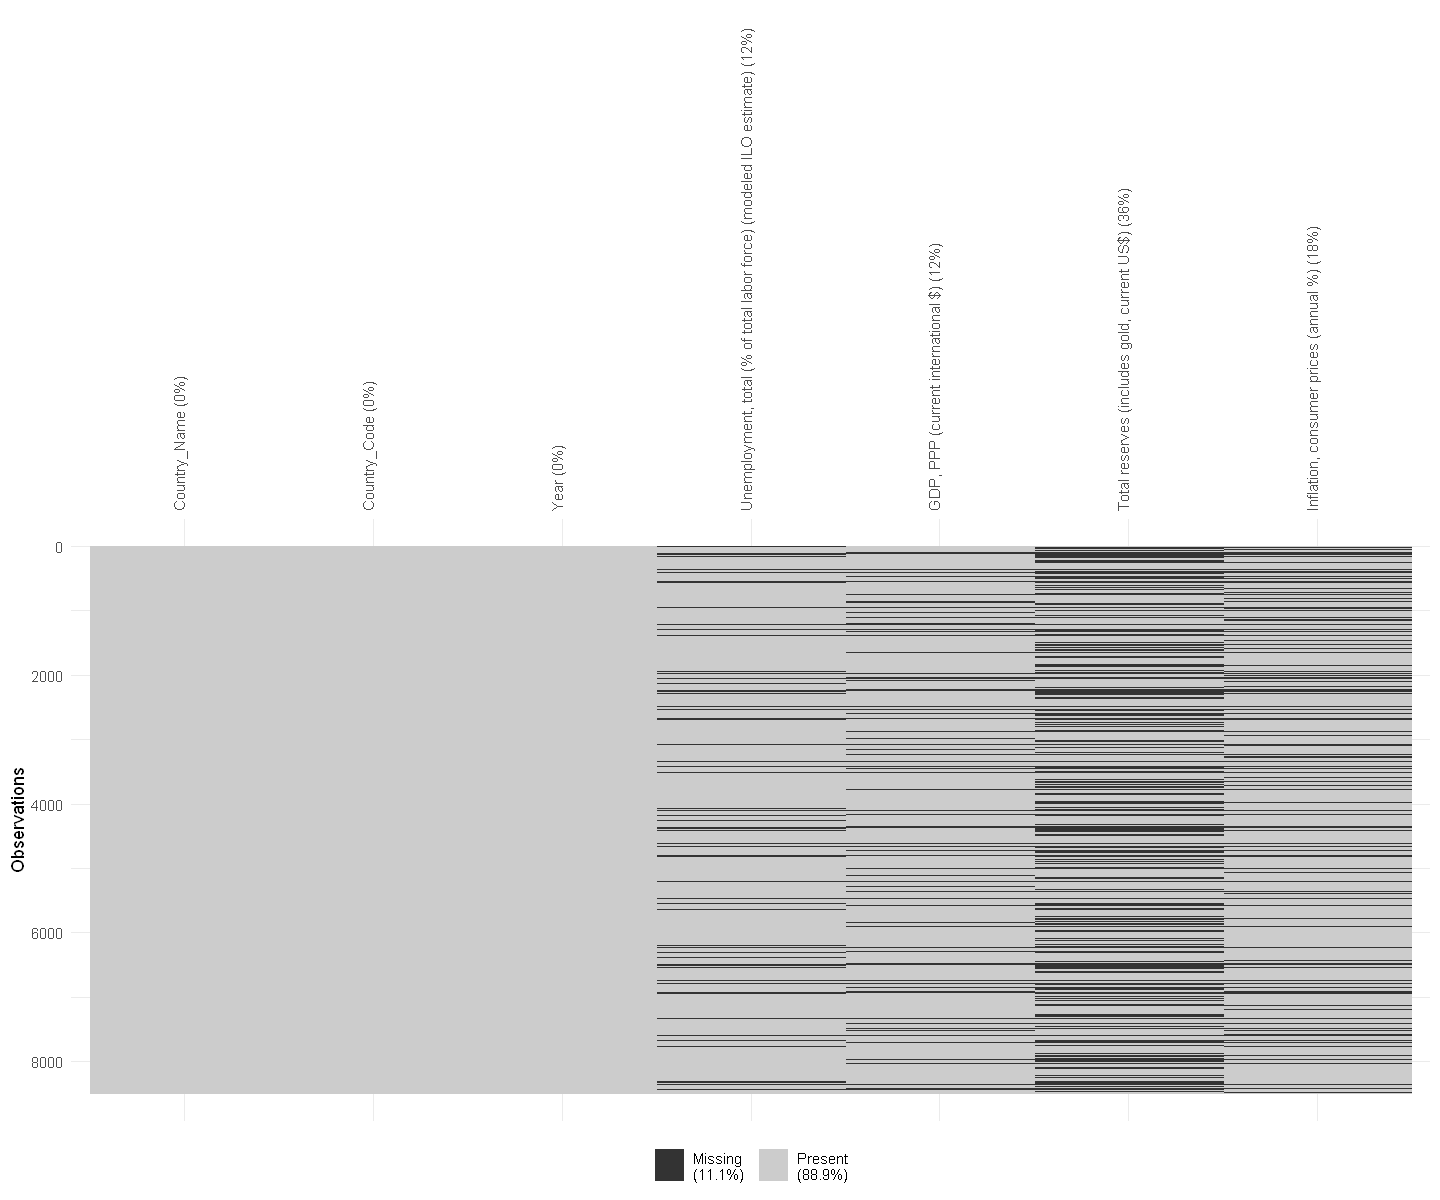

In [19]:
d <- Economic_factors_2 %>% 
    vis_miss() + 
    theme(axis.text.x = element_text(angle = 90))

d

### comment

Variable **Total reserves** still has many missing values but others have between 12 and 18. So, we decided to remove variable **Total reserves** as well. 

In [20]:
Economic_factors_SemiClean <- Economic_factors_2 %>%
    select(-"Total reserves (includes gold, current US$)") %>%
    rename(Unemployment_rate = "Unemployment, total (% of total labor force) (modeled ILO estimate)",
           GDP = "GDP, PPP (current international $)",
           Inflation_rate = "Inflation, consumer prices (annual %)")

Economic_factors_SemiClean

Country_Name,Country_Code,Year,Unemployment_rate,GDP,Inflation_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1991,NA,1.522141e+09,5.5555556
Africa Eastern and Southern,AFE,1991,7.333336,5.825389e+11,17.6781003
Afghanistan,AFG,1991,8.121000,NA,NA
Africa Western and Central,AFW,1991,4.224595,3.784670e+11,1.7418879
Angola,AGO,1991,4.489000,4.054678e+10,83.7837838
Albania,ALB,1991,10.307000,6.237345e+09,NA
Andorra,AND,1991,NA,NA,NA
Arab World,ARB,1991,11.663443,1.678253e+12,9.0000000
United Arab Emirates,ARE,1991,1.887000,1.661190e+11,NA


### comment

Following the decision we made above, the **Total reserves** column has been removed and we changed the remaining variables' column names to use the data easily.

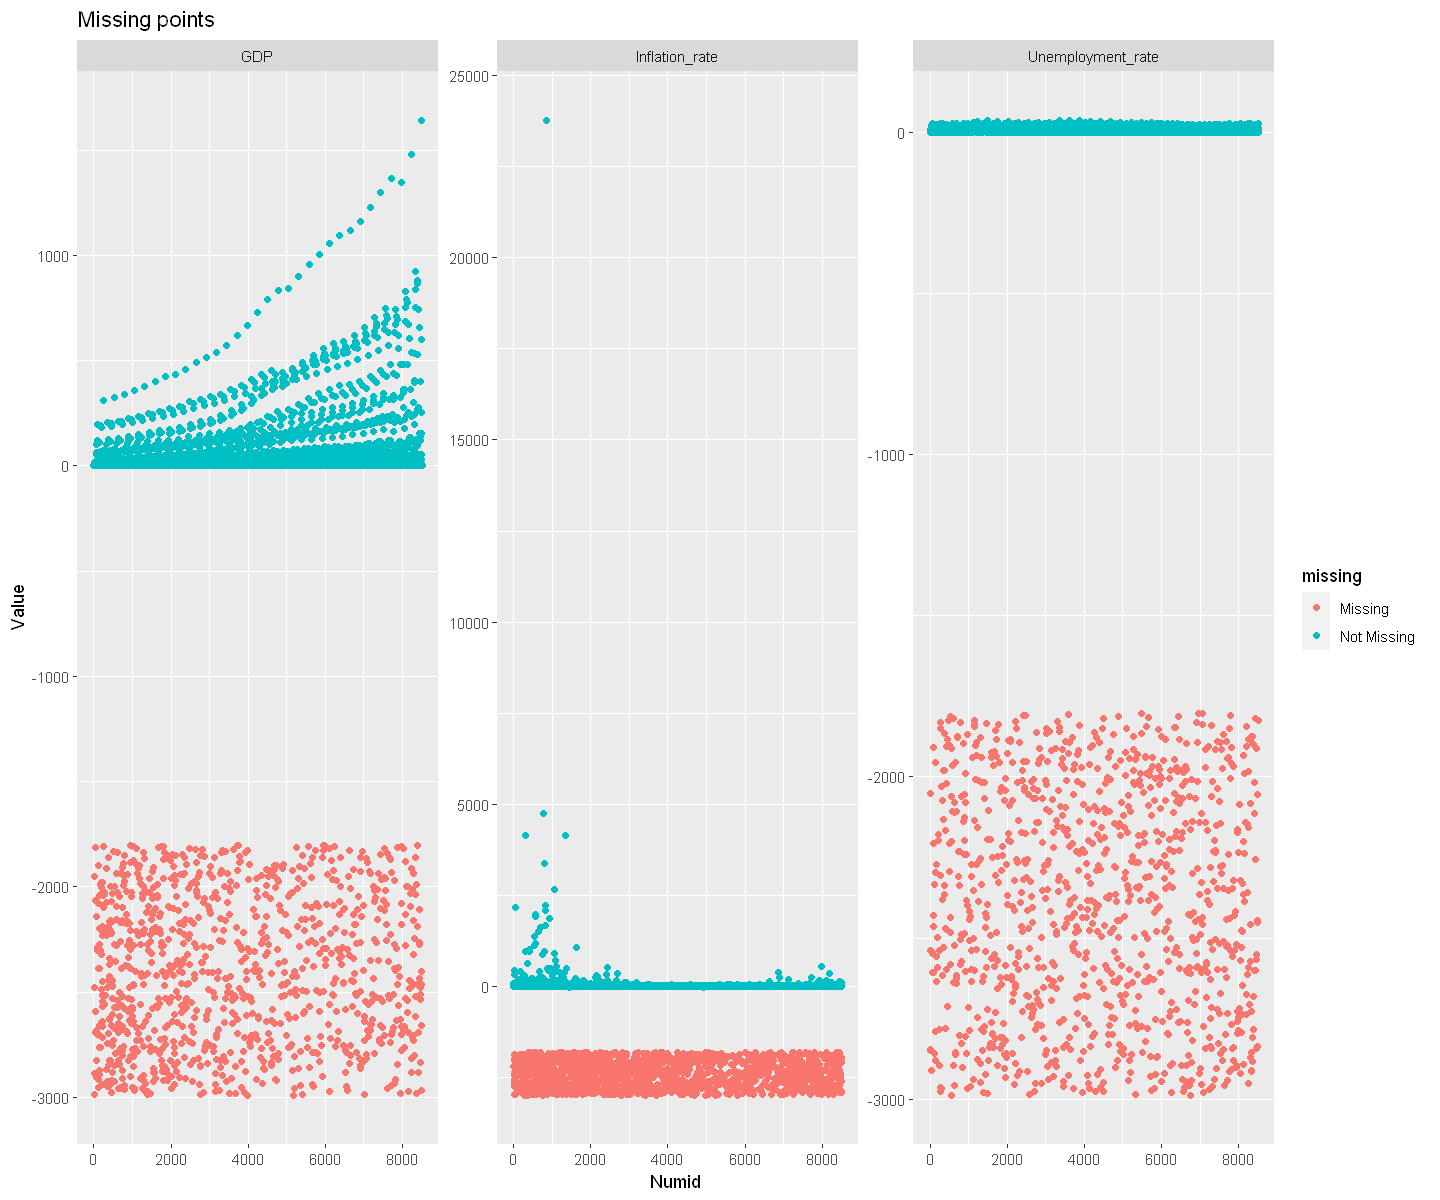

In [21]:
library(naniar)

e <- Economic_factors_SemiClean %>%
    mutate(Numid = 1:n()) %>%
    select(Numid, Unemployment_rate, GDP, Inflation_rate) %>%
    mutate(GDP = GDP/100000000000) %>%
    gather(key = Indicator,
           value = Value,
           -Numid) %>%
    ggplot() +
    geom_miss_point(mapping = aes(x= Numid, y= Value)) + 
    labs(title = "Missing points") +
    facet_wrap(~Indicator, scales = "free_y")

e

### comment

For the next step, we need to decide the missing value strategy for remaining variables. There are three kind of missingness type which are MACR, MAR, MNAR. When the data is missing completely at random, partial deletion and imputation both are unbiased. When the data is missing at random, partial deletion can occur the bias so imputation is a good method. However, when the data is missing at not random, both methods can occur bias so we can't use them. We usually need domain knowledge to deal with them. For this project, we will rule out MNAR arbitrarily as we don't have domain knowledge and want to make missing value strategies. 

In this case, imputation can be a good choice because it can be used for both MACR and MAR. Also, we don't want to lose more data as we already cut off the half of it. To check which imputation can be conducted, we plot the `geom_miss_point` graph in `ggplot2`. We add **Numid** column which is just row number column with `mutate()` function because we want the plot to have observation number on its x-axis to see the trend of data and homogenity of missing values. We were considering between knn imputation and mean imputation. Missing values are spread across the dataset for all variables but variable **GDP** has a increasing trend and **inflation_rate** has some prominent outliers. As mean is not robust metrics, the mean imputation might be affect those outliers and cannot follow the trend line. Therefore, we deicded to implement knn imputation for `economic factors` dataset.

In [22]:
Economic_factors_SemiClean %>%
    arrange(desc(Inflation_rate)) %>%
    head(10)

Country_Name,Country_Code,Year,Unemployment_rate,GDP,Inflation_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"Congo, Dem. Rep.",COD,1994,2.993,2.299809e+10,23773.132
Ukraine,UKR,1993,2.000,3.018388e+11,4734.914
Angola,AGO,1996,4.274,4.269822e+10,4145.106
"Congo, Dem. Rep.",COD,1992,3.043,2.645126e+10,4129.170
Armenia,ARM,1994,6.600,5.354228e+09,3373.759
Angola,AGO,1995,4.304,3.692872e+10,2666.451
Belarus,BLR,1994,12.800,4.290086e+10,2221.017
"Congo, Dem. Rep.",COD,1991,3.040,2.889597e+10,2154.437
Brazil,BRA,1994,6.470,1.230570e+12,2075.888


### comment

Arranged the data in descending order by **Inflation_rate** to check what the outlier is. We searched for Congo, Dem. Rep's inflation rate in 1994 and it was real. Therefore, we need to keep this in the dataset.

In [23]:
library(VIM)

Economic_factors_Clean <- Economic_factors_SemiClean %>%
    kNN(k=5) %>%
    select(-ends_with("imp"))

Economic_factors_Clean

Loading required package: colorspace

Loading required package: grid

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep




Country_Name,Country_Code,Year,Unemployment_rate,GDP,Inflation_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1991,16.934000,1.522141e+09,5.5555556
Africa Eastern and Southern,AFE,1991,7.333336,5.825389e+11,17.6781003
Afghanistan,AFG,1991,8.121000,2.198038e+10,8.6805708
Africa Western and Central,AFW,1991,4.224595,3.784670e+11,1.7418879
Angola,AGO,1991,4.489000,4.054678e+10,83.7837838
Albania,ALB,1991,10.307000,6.237345e+09,5.5570615
Andorra,AND,1991,8.121000,2.198038e+10,65.9785680
Arab World,ARB,1991,11.663443,1.678253e+12,9.0000000
United Arab Emirates,ARE,1991,1.887000,1.661190e+11,6.2499993


### comment

`VIM` library has `kNN()` imputation function. We set `k=5`. The `kNN()` function not only imputes the data but also adds extra variables which are logical type variable so that you can check if the values are imputed or not. We don't need to find out if it's imformative missingness for this project, so the columns end with "imp" were dropped.

Now the `Economic_factors_clean` table has no missing values and has a good format for further analysis.

In [24]:
social_data_names <- c("Intentional homicides.csv",
                       "suicide mortality rate.csv",
                       "Net migration.csv",
                       "Proportion of seats held by women in national parliaments.csv",
                       "Life expectancy at birth.csv",
                       "Birthrate,Crude(per1,000).csv")

Social_factors <- myfunction(social_data_names)

New names:
* `` -> `...68`
Rows: 266 Columns: 68
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (32): 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, ...
lgl (32): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
* `` -> `...68`
Rows: 266 Columns: 68
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (20): 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, ...
lgl (44): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column typ

### comment

We also wanted to see if non-economic social factors also affect to population. We downloaded 6 social issue related csv files and used the function defined above to make a table. This step is similar to the economic factor data table building.

In [25]:
Social_factors

Country_Name,Country_Code,Year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",Net migration,Proportion of seats held by women in national parliaments (%),"Life expectancy at birth, total (years)","Birth rate, crude (per 1,000 people)"
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1960,NA,NA,0,NA,64.15200,33.88300
Africa Eastern and Southern,AFE,1960,NA,NA,-90849,NA,44.08555,47.43855
Afghanistan,AFG,1960,NA,NA,2606,NA,32.53500,50.34000
Africa Western and Central,AFW,1960,NA,NA,-847,NA,37.84515,47.32548
Angola,AGO,1960,NA,NA,-43749,NA,38.21100,51.02600
Albania,ALB,1960,NA,NA,15540,NA,54.43900,41.06800
Andorra,AND,1960,NA,NA,642,NA,NA,NA
Arab World,ARB,1960,NA,NA,-111478,NA,44.97290,47.60996
United Arab Emirates,ARE,1960,NA,NA,3916,NA,48.81100,41.81400


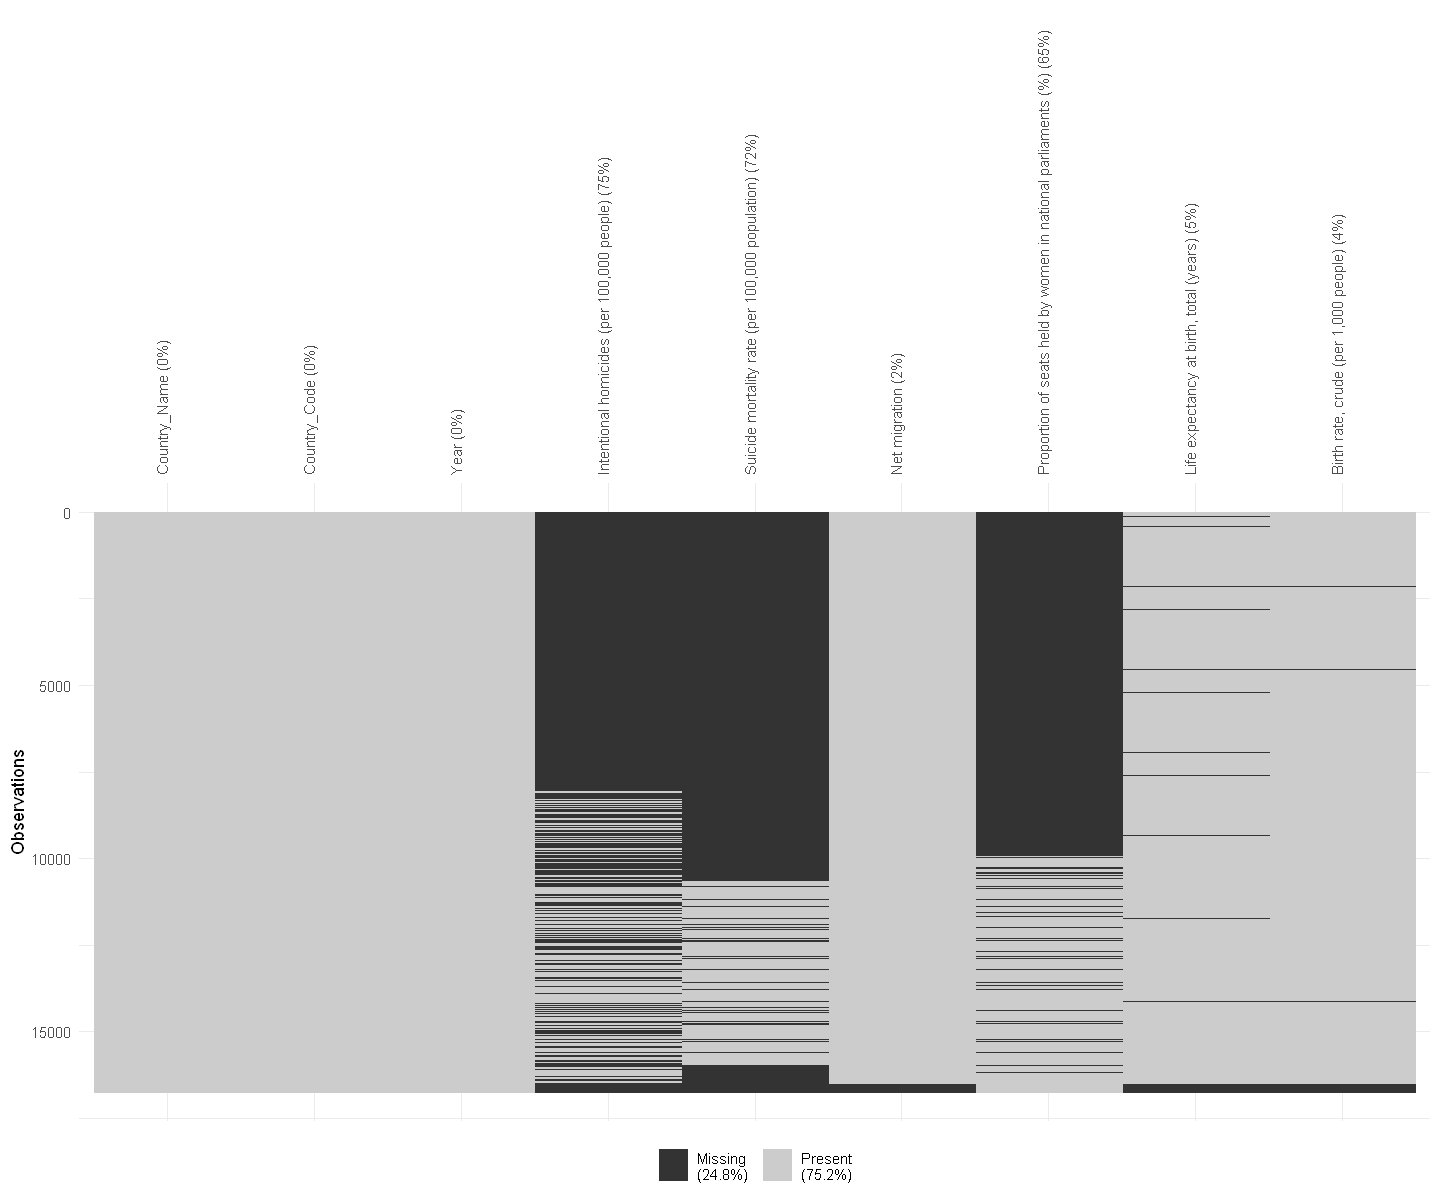

In [26]:
f <- Social_factors %>% 
    vis_miss() + 
    theme(axis.text.x = element_text(angle = 90))

f

### comment 

Same as before, we checked missingness with `vis_miss()` graph. There are three excessively missing variables including **Intentional homicides**, **Suicide mortality**, and **Proportion of seats held by women in national parliaments**. 

In [27]:
Social_factors <- Social_factors %>%
    select(-"Intentional homicides (per 100,000 people)",
           -"Suicide mortality rate (per 100,000 population)",
           -"Proportion of seats held by women in national parliaments (%)") %>%
    rename(Net_migration = "Net migration",
           Life_expectancy = "Life expectancy at birth, total (years)",
           Birth_rate = "Birth rate, crude (per 1,000 people)")

Social_factors

Country_Name,Country_Code,Year,Net_migration,Life_expectancy,Birth_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1960,0,64.15200,33.88300
Africa Eastern and Southern,AFE,1960,-90849,44.08555,47.43855
Afghanistan,AFG,1960,2606,32.53500,50.34000
Africa Western and Central,AFW,1960,-847,37.84515,47.32548
Angola,AGO,1960,-43749,38.21100,51.02600
Albania,ALB,1960,15540,54.43900,41.06800
Andorra,AND,1960,642,NA,NA
Arab World,ARB,1960,-111478,44.97290,47.60996
United Arab Emirates,ARE,1960,3916,48.81100,41.81400


### comment

Therefore, we dropped the excessively missing columns and renamed remaining variables into easily usable names. 

In [28]:
rows_with_na <- !complete.cases(Social_factors)

Social_factors[rows_with_na, ]

Country_Name,Country_Code,Year,Net_migration,Life_expectancy,Birth_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Andorra,AND,1960,642,NA,NA
American Samoa,ASM,1960,-260,NA,NA
Cayman Islands,CYM,1960,-32,NA,NA
Faroe Islands,FRO,1960,-60,NA,NA
Greenland,GRL,1960,156,NA,NA
Not classified,INX,1960,NA,NA,NA
Israel,ISR,1960,39949,NA,26.9
Liechtenstein,LIE,1960,201,NA,23.1
Monaco,MCO,1960,85,NA,NA


### comment

To check the remaining variables' missing values, `complete.cases()` function was used. This function is usually used for remove the missing values but also can extract the rows that have missing values by putting **!** in front of the function. 

We expected three variables are missing in later part of data frame. However, it looks like **Life_expectancy** and **Birth_rate** are missing together, which we didn't expect. It somehow makes sense because **Life_expectancy** is Life expectancy at birth. If they are missing at pattern, we know imputation and partial deletion both can make bias. However, again, we want to deal with missing values in this stages for further analysis, so we will do partial deletion this time. In many cases, two or three variables are missing together in that row. It will be better to delete those observations rather than having all imputed values for three variables.

In [29]:
Social_factors_Clean <- Social_factors %>%
    na.omit()

Social_factors_Clean

Country_Name,Country_Code,Year,Net_migration,Life_expectancy,Birth_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Aruba,ABW,1960,0,64.15200,33.88300
Africa Eastern and Southern,AFE,1960,-90849,44.08555,47.43855
Afghanistan,AFG,1960,2606,32.53500,50.34000
Africa Western and Central,AFW,1960,-847,37.84515,47.32548
Angola,AGO,1960,-43749,38.21100,51.02600
Albania,ALB,1960,15540,54.43900,41.06800
Arab World,ARB,1960,-111478,44.97290,47.60996
United Arab Emirates,ARE,1960,3916,48.81100,41.81400
Argentina,ARG,1960,20399,63.97800,23.78400


### comment

We implemented `na.omit()` to delete the observations that have missing values. The table `Social_factors_Clean` has no missing values and a good format to manipulate in further process. 

In [32]:
write_csv(Population_Clean, "Population_Clean.csv")
write_csv(Economic_factors_Clean, "Economic_factors_Clean.csv")
write_csv(Social_factors_Clean, "Social_factors_Clean.csv")

In [31]:
ggsave("Population_missing_value_ratio.pdf", plot = a)
ggsave("Population_growth_missing_value_ratio.pdf", plot = b)
ggsave("economic_factors_missing_value_ratio.pdf", plot = c)
ggsave("economic_factors_missing_value_ratio_after_1990.pdf", plot = d)
ggsave("Missing values for economic factors.pdf", plot = e)
ggsave("social_factors_missing_value_ratio.pdf", plot = f)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


### comment

All three tables are saved in csv format and plots are saved using `ggsave()` in pdf format.

### Reference

https://www.rdocumentation.org/packages/VIM/versions/6.2.2

https://blog.devgenius.io/knn-imputation-with-r-ba296cc71c6d

